In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("video_games_sales.csv")

# Display first 5 rows
print(df.head())

# Check shape (rows, columns)
print("Shape of dataset:", df.shape)

# Check column data types
print("\nColumn Data Types:\n", df.dtypes)

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [6]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

print(df.info())
print(df.describe())


Missing Values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales

In [7]:
# data cleaning

# Drop rows with missing Name or Genre
df.dropna(subset=['Name', 'Genre'], inplace=True)

# Fill missing categorical columns with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)
df['Developer'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

# Convert 'User_Score' to numeric
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Convert Year_of_Release to int
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')

# Fill numerical columns with their mean
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(), inplace=True)
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)
df['User_Count'].fillna(df['User_Count'].mean(), inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Final check
print("\nCleaned Dataset")
print(df.info())


Cleaned Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: Int64(1), float64(9), object(6)
memory

C:\Users\sanja\AppData\Local\Temp\ipykernel_15872\596964360.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)
C:\Users\sanja\AppData\Local\Temp\ipykernel_15872\596964360.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [8]:
# Add Decade column
df['Decade'] = (df['Year_of_Release'] // 10) * 10

# Region sales share (optional for visualizations)
df['NA_Share'] = df['NA_Sales'] / df['Global_Sales']
df['EU_Share'] = df['EU_Sales'] / df['Global_Sales']
df['JP_Share'] = df['JP_Sales'] / df['Global_Sales']

# User > Critic score?
df['User_Score'] = df['User_Score'] * 10  # To match critic scale out of 100
df['User_Higher'] = df['User_Score'] > df['Critic_Score']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
 16  Decade           16448 non-null  Int64  
 17  NA_Share    

C:\Users\sanja\AppData\Local\Temp\ipykernel_15872\2630726184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='magma')


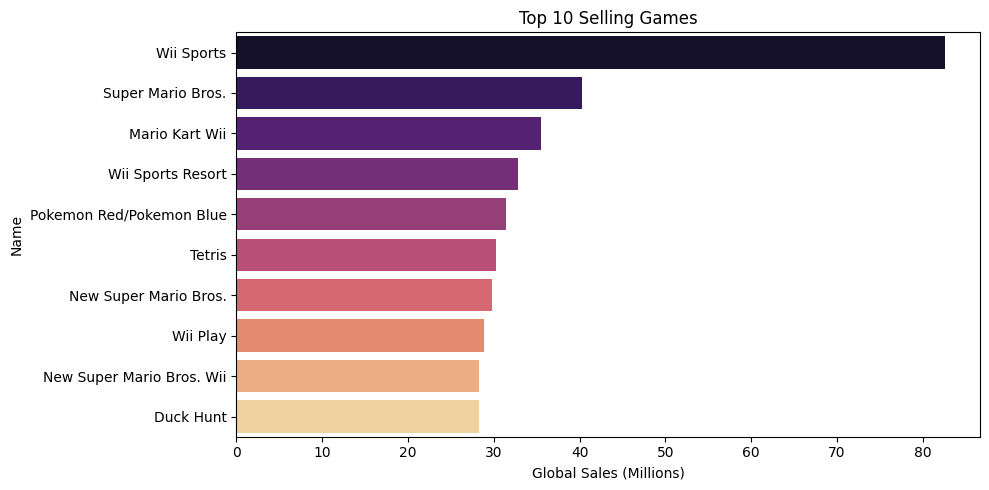

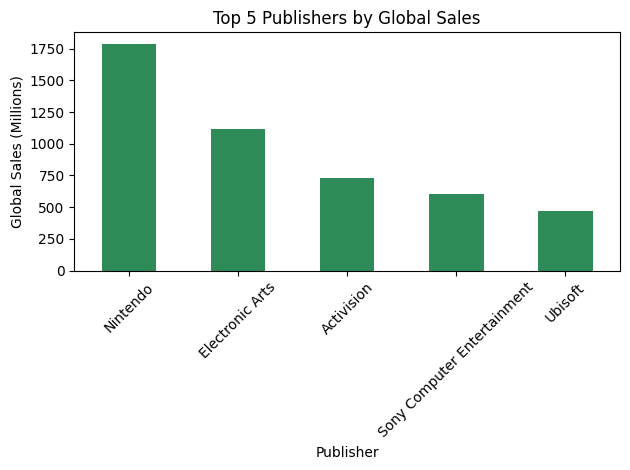

In [9]:
# === 2. TOP PERFORMERS & MARKET LEADERS ===
import seaborn as sns
import matplotlib.pyplot as plt
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='magma')
plt.title('Top 10 Selling Games')
plt.xlabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
top_publishers.plot(kind='bar', color='seagreen', title='Top 5 Publishers by Global Sales')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

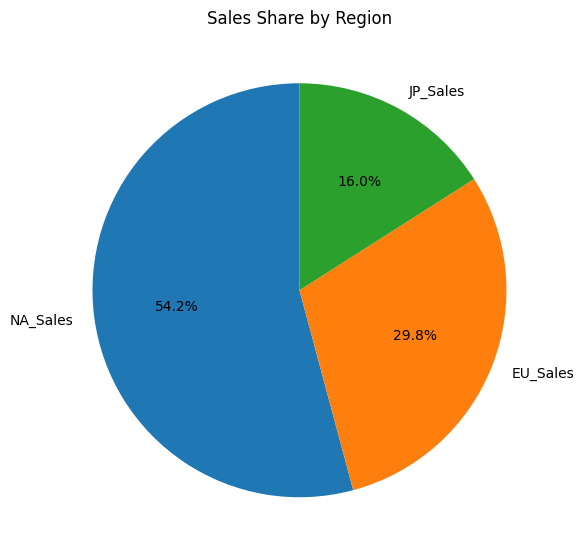

In [10]:
# === SALES BY REGION ===
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

plt.figure(figsize=(6, 6))
region_sales.plot.pie(autopct='%1.1f%%', startangle=90, title='Sales Share by Region')
plt.tight_layout()
plt.show()

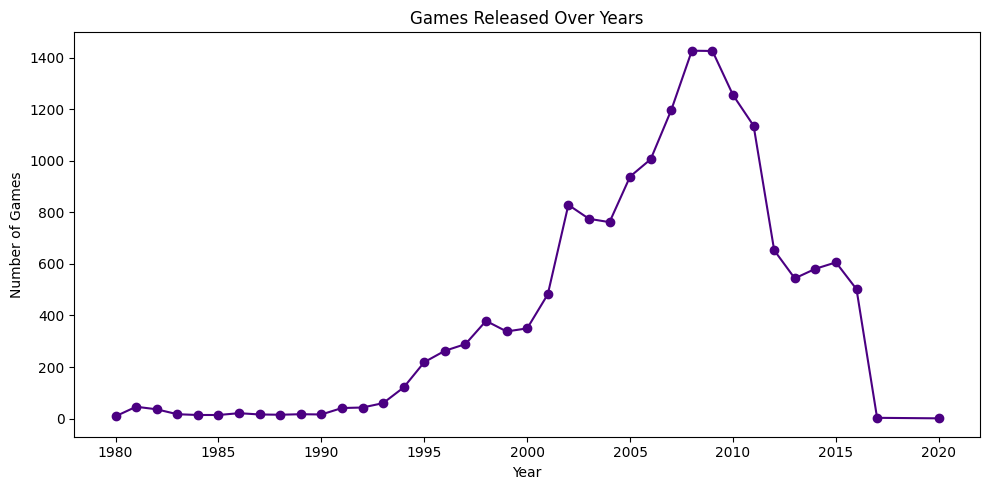

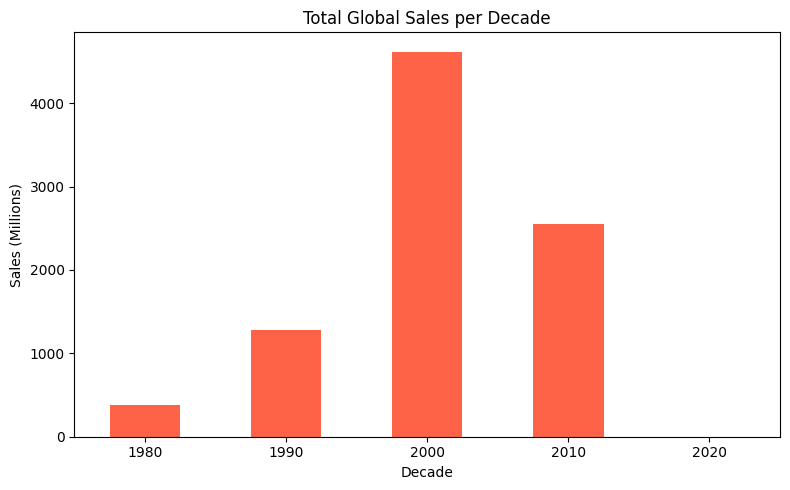

In [11]:
# === TRENDS OVER TIME ===
games_per_year = df['Year_of_Release'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
games_per_year.plot(kind='line', marker='o', color='indigo')
plt.title('Games Released Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

sales_by_decade = df.groupby('Decade')['Global_Sales'].sum()

plt.figure(figsize=(8, 5))
sales_by_decade.plot(kind='bar', color='tomato')
plt.title('Total Global Sales per Decade')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Save cleaned dataset to CSV
df.to_csv('vgscleaned.csv', index=False)

print("Cleaned dataset saved successfully as 'vgs_cleaned.csv'")


Cleaned dataset saved successfully as 'vgs_cleaned.csv'
